In [340]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import numpy as np
warnings.filterwarnings('ignore')

In [341]:
#czytamy dane
tb = pd.read_csv('tobacco.csv')
tb.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1
0,1996,Puerto Rico,9.40%,5.10%,16%,69.50%,Puerto Rico\n
1,1997,Puerto Rico,9.40%,5%,15.70%,69.90%,Puerto Rico\n
2,1998,Puerto Rico,10.10%,5.20%,16.80%,67.90%,Puerto Rico\n
3,1999,Puerto Rico,9.70%,4%,15.30%,71%,Puerto Rico\n
4,2000,Puerto Rico,9.20%,3.90%,15.20%,71.60%,Puerto Rico\n


In [342]:
#do dalszych obliczeń należy przekonwertować dane tesktowe na liczbowe

tb.columns = ['Rok', 'Stan', 'Codziennie', 'Czasami', 'Były','Nigdy', 'Loc']
columns = ['Codziennie', 'Czasami', 'Były', 'Nigdy']

for x in columns:
    tb[x] = tb[x].str.strip('%').astype('float')
tb.head()

,Rok,Stan,Codziennie,Czasami,Były,Nigdy,Loc
0,1996,Puerto Rico,9.4,5.1,16.0,69.5,Puerto Rico\n
1,1997,Puerto Rico,9.4,5.0,15.7,69.9,Puerto Rico\n
2,1998,Puerto Rico,10.1,5.2,16.8,67.9,Puerto Rico\n
3,1999,Puerto Rico,9.7,4.0,15.3,71.0,Puerto Rico\n
4,2000,Puerto Rico,9.2,3.9,15.2,71.6,Puerto Rico\n


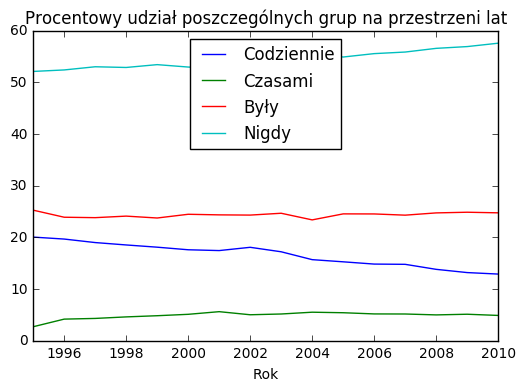

In [343]:
#grupujemy dane według lat i liczymy ich średnią wartość

avg_years = tb.groupby(['Rok']).mean().reset_index()
tytul = 'Procentowy udział poszczególnych grup na przestrzeni lat'
avg_years.plot(x = ['Rok'],y = ['Codziennie', 'Czasami', 'Były', 'Nigdy'], title=tytul)

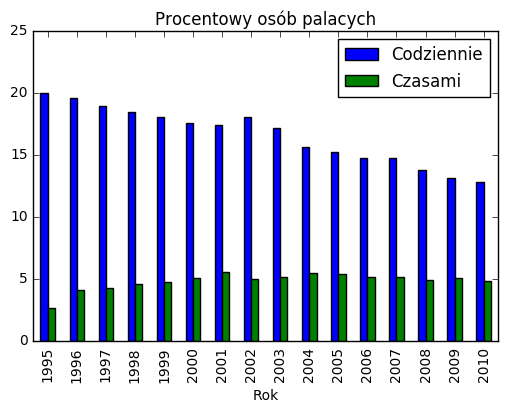

In [344]:
# procent palaczy (codziennych ,od czasu do czasu i byłych)
tytul ='Procentowy osób palacych'
avg_years.plot(x = ['Rok'],y = ['Codziennie', 'Czasami'],kind = 'bar',title=tytul)

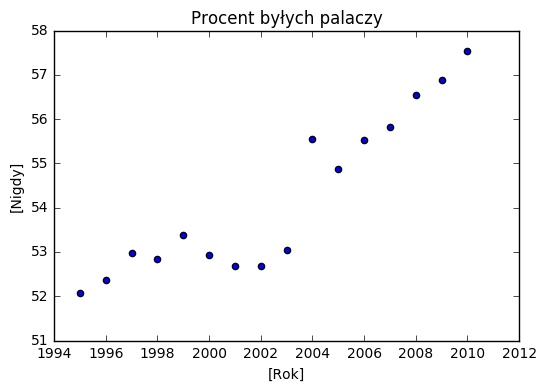

In [345]:
# procent osób nigdy nie palących

avg_years.plot.scatter(x = ['Rok'],y = ['Nigdy'],title='Procent byłych palaczy')

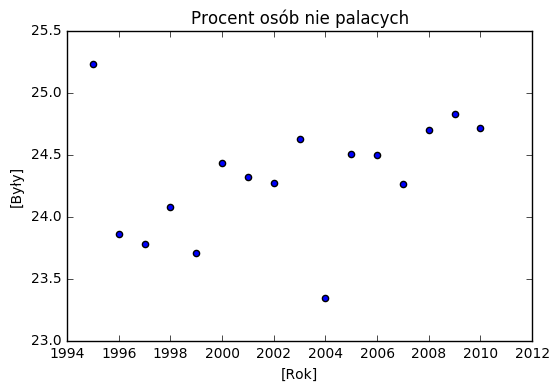

In [346]:
# procent byłych palaczy

avg_years.plot.scatter(x = ['Rok'],y = ['Były'],title='Procent osób nie palacych')

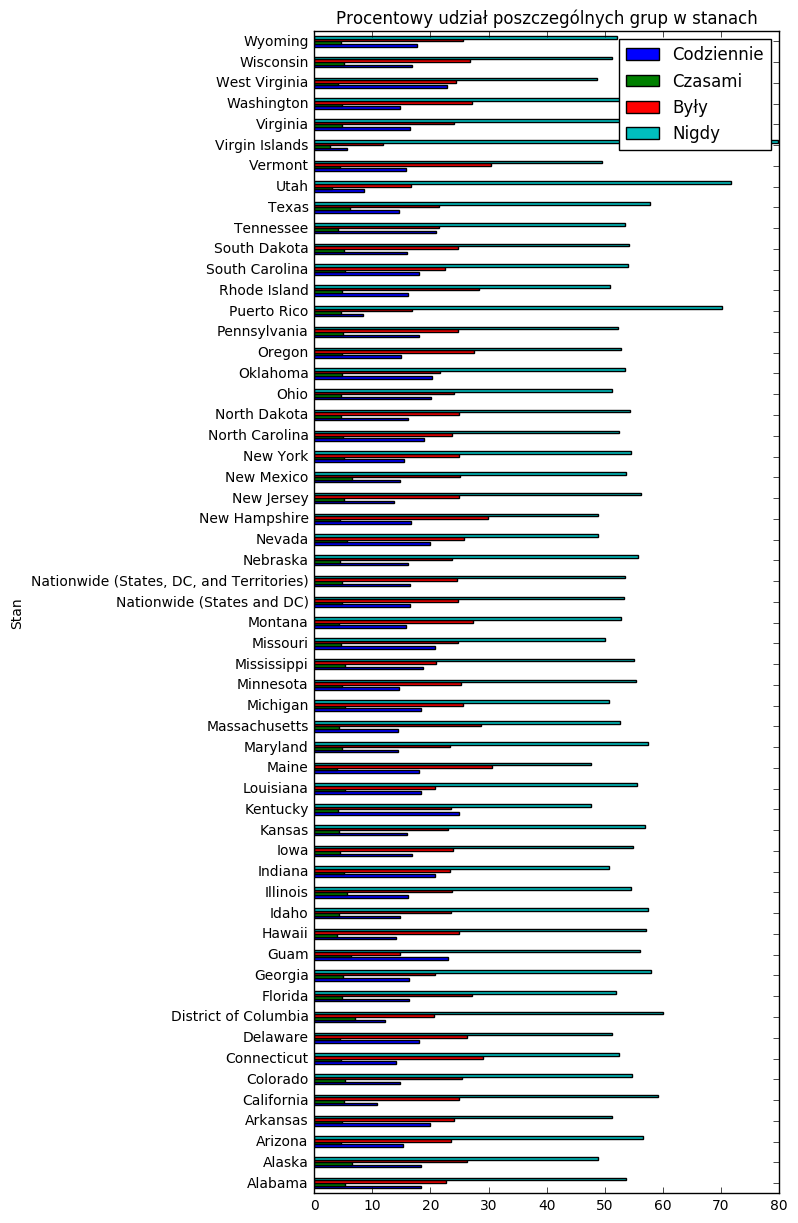

In [347]:
#grupujemy dane według stanów i liczymy ich średnią wartość

avg_state = tb.iloc[:,1:]
avg_state = avg_state.groupby(['Stan']).mean()

avg_state.plot(kind ='barh',title='Procentowy udział poszczególnych grup w stanach', figsize = (6,15))

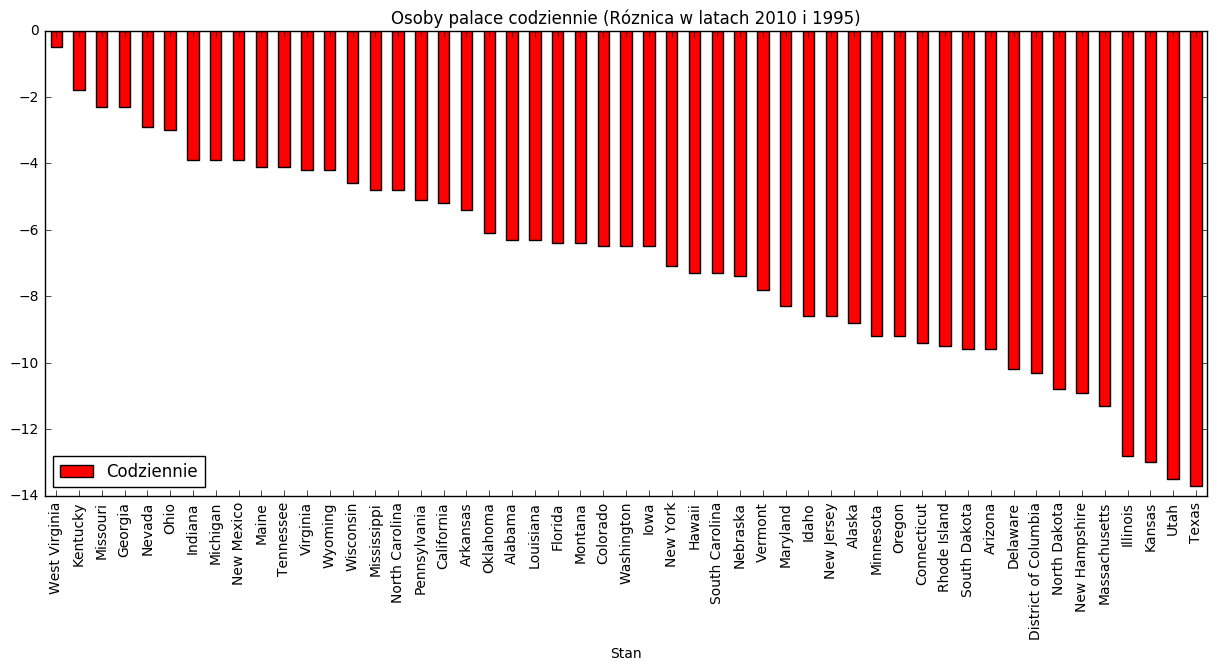

In [348]:
avg_state_year = tb.groupby(['Rok','Stan']).mean().reset_index()

#tylko rok 1995
rok_1995 = avg_state_year[avg_state_year.Rok == 1995]
rok_1995 = rok_1995.sort_values('Stan')
rok_1995.index = range(51)

#tylko rok 2010
rok_2010 = avg_state_year[avg_state_year.Rok == 2010].sort_values('Stan')
rok_2010 = rok_2010.drop(rok_2010.index[[11,28,29,42,50]])
rok_2010.index = range(51)

stany = rok_2010.iloc[:,1]

roznica_palaczy = rok_2010['Codziennie'] - rok_1995['Codziennie']
numpy_roznica_palaczy = np.asarray(rok_2010['Codziennie'].subtract(rok_1995['Codziennie'], axis=0))
roznica_palaczy = pd.concat([roznica_palaczy, stany],axis=1)
roznica_palaczy.sort(columns = 'Codziennie', ascending = False, inplace = True)

roznica_palaczy.plot( x = ['Stan'], kind ='bar',color = 'r',title='Osoby palace codziennie (Róznica w latach 2010 i 1995)', figsize = (15,6))


In [349]:

us_states = np.asarray(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
                        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
                        'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
                        'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'])

data = [dict(type = 'choropleth', locations = us_states, locationmode = 'USA-states', z = numpy_roznica_palaczy )]

layout = dict( title = 'Osoby palace codziennie (Róznica w latach 2010 i 1995)', geo = dict(scope = 'usa') )

figure = dict(data = data, layout = layout)
iplot(figure)

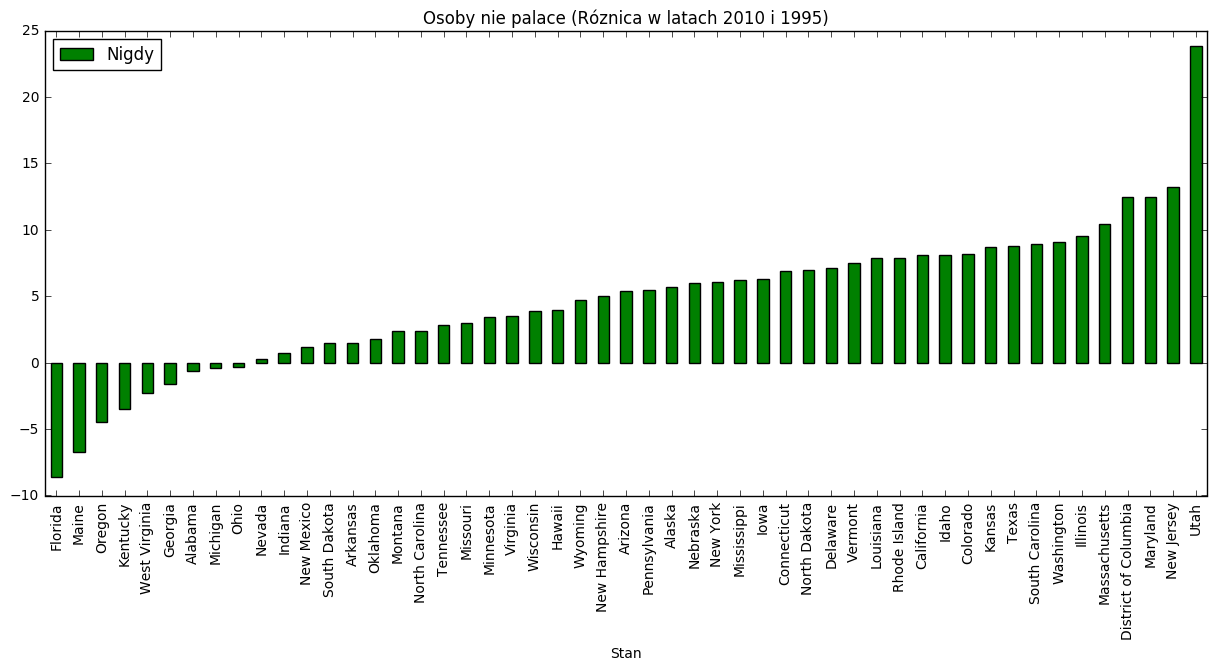

In [350]:
roznica_nie_palaczy = rok_2010['Nigdy'] - rok_1995['Nigdy']
numpy_roznica_nie_palaczy = np.asarray(rok_2010['Nigdy'].subtract(rok_1995['Nigdy'], axis=0))

roznica_nie_palaczy = pd.concat([roznica_nie_palaczy, stany],axis=1)
roznica_nie_palaczy.sort(columns = 'Nigdy', inplace = True)

roznica_nie_palaczy.plot( x = ['Stan'],color = 'g', kind ='bar',title='Osoby nie palace (Róznica w latach 2010 i 1995)', figsize = (15,6))


In [351]:
data = [dict(type = 'choropleth', locations = us_states, locationmode = 'USA-states', z = numpy_roznica_nie_palaczy )]

layout = dict( title = 'Osoby nie palace (Róznica w latach 2010 i 1995)', geo = dict(scope = 'usa') )

figure = dict(data = data, layout = layout)
iplot(figure)

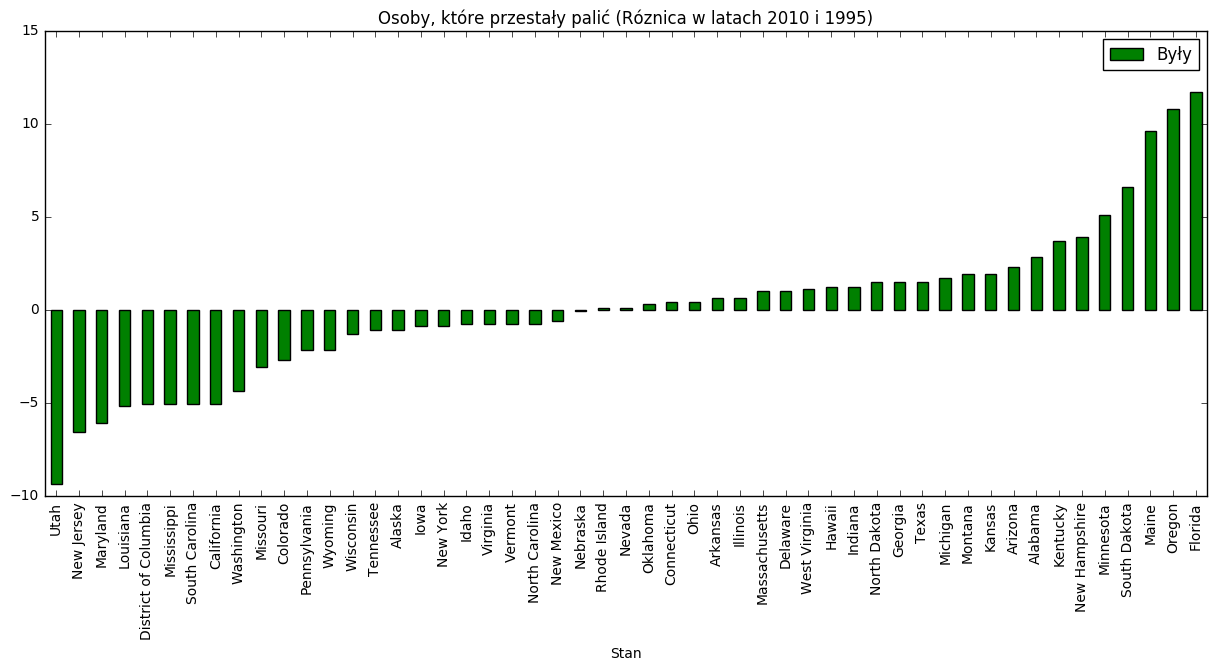

In [352]:
roznica_bylych_palaczy = rok_2010['Były'] - rok_1995['Były']
numpy_roznica_bylych_palaczy = np.asarray(rok_2010['Były'].subtract(rok_1995['Były'], axis=0))

roznica_bylych_palaczy = pd.concat([roznica_bylych_palaczy, stany],axis=1)
roznica_bylych_palaczy.sort(columns = 'Były', inplace = True)

roznica_bylych_palaczy.plot( x = ['Stan'],color = 'g', kind ='bar',title='Osoby, które przestały palić (Róznica w latach 2010 i 1995)', figsize = (15,6))



In [353]:
data = [dict(type = 'choropleth', locations = us_states, locationmode = 'USA-states', z = numpy_roznica_bylych_palaczy )]

layout = dict( title = 'Osoby, które przestały palić (Róznica w latach 2010 i 1995)', geo = dict(scope = 'usa') )

figure = dict(data = data, layout = layout)
iplot(figure)